In [1]:
!hostname

chinook04.rcs.alaska.edu


In [85]:
import os
import glob
import numpy as np
import pandas as pd
import xarray as xr
import regionmask
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import cartopy.crs as ccrs
import cartopy.feature as cfeature


Loading in Normalized data
-

In [86]:
path='/center1/DYNDOWN/phutton5/ROS/All_of_AK/All_of_AK_netcdf_files/'
pattern = 'ROS_Monthly_*.nc'
file_list = sorted(glob.glob(os.path.join(path, pattern)))
all_AK_era5 = xr.open_mfdataset(file_list, combine='by_coords', engine='netcdf4')
seasons_str = [str(s) for s in all_AK_era5['season'].values]

In [87]:
path='/center1/DYNDOWN/phutton5/ROS/All_of_AK/All_of_AK_netcdf_files/REGRIDDED_NEAREST_ros_stats_per_borough.nc/'
ERA5_4km_data_NEAREST = xr.open_dataset(path,  engine='netcdf4')
path='/center1/DYNDOWN/phutton5/ROS/All_of_AK/All_of_AK_netcdf_files/REGRIDDED_BILINEAR_ros_stats_per_borough.nc/'
ERA5_4km_data = xr.open_dataset(path,  engine='netcdf4')

#path2=("/center1/DYNDOWN/phutton5/ROS/Raw_ERA5/Raw_ERA5_netcdf/Raw_ERA5_normalzed_per_borough.nc")
#ERA5_31km_data = xr.open_dataset(path2,  engine='netcdf4')

path='/center1/DYNDOWN/phutton5/ROS/All_of_AK/All_of_AK_netcdf_files/TEST2_ERA5_4km_normalized_per_borough.nc'
ERA5_4km_data_NEAREST = xr.open_dataset(path,  engine='netcdf4')

path='/center1/DYNDOWN/phutton5/ROS/All_of_AK/All_of_AK_netcdf_files/TEST2_ERA5_31km_normalized_per_borough.nc'
ERA5_31km = xr.open_dataset(path,  engine='netcdf4')

In [88]:
seasons_str

['1950-1951',
 '1951-1952',
 '1952-1953',
 '1953-1954',
 '1954-1955',
 '1955-1956',
 '1956-1957',
 '1957-1958',
 '1958-1959',
 '1959-1960',
 '1960-1961',
 '1961-1962',
 '1962-1963',
 '1963-1964',
 '1964-1965',
 '1965-1966',
 '1966-1967',
 '1967-1968',
 '1968-1969',
 '1969-1970',
 '1970-1971',
 '1971-1972',
 '1972-1973',
 '1973-1974',
 '1974-1975',
 '1975-1976',
 '1976-1977',
 '1977-1978',
 '1978-1979',
 '1979-1980',
 '1980-1981',
 '1981-1982',
 '1982-1983',
 '1983-1984',
 '1984-1985',
 '1985-1986',
 '1986-1987',
 '1987-1988',
 '1988-1989',
 '1989-1990',
 '1990-1991',
 '1991-1992',
 '1992-1993',
 '1993-1994',
 '1994-1995',
 '1995-1996',
 '1996-1997',
 '1997-1998',
 '1998-1999',
 '1999-2000',
 '2000-2001',
 '2001-2002',
 '2002-2003',
 '2003-2004',
 '2004-2005',
 '2005-2006',
 '2006-2007',
 '2007-2008',
 '2008-2009',
 '2009-2010',
 '2010-2011',
 '2011-2012',
 '2012-2013',
 '2013-2014',
 '2014-2015',
 '2015-2016',
 '2016-2017',
 '2017-2018',
 '2018-2019',
 '2019-2020',
 '2020-2021',
 '2021

In [89]:
mismatched_boroughs = []

borough_list = list(ERA5_31km_data['borough'].values)

for borough_name in borough_list:
    data_31km = ERA5_31km_data['normalized'].sel(borough=borough_name).values
    data_4km  = ERA5_4km_data_NEAREST['normalized'].sel(borough=borough_name).values

    valid_mask = (~np.isnan(data_31km)) & (~np.isnan(data_4km))
    if not valid_mask.any():
        mismatched_boroughs.append(borough_name)

borough_list_filtered = [b for b in borough_list if b not in mismatched_boroughs]

print("Boroughs to keep:", borough_list_filtered)

Boroughs to keep: ['Aleutians East Borough', 'Bethel Census Area', 'Bristol Bay Borough', 'Chugach Census Area', 'City and Borough of Yakutat', 'Copper River Census Area', 'Denali Borough', 'Dillingham Census Area', 'Fairbanks North Star Borough', 'Kenai Peninsula Borough', 'Kodiak Island Borough', 'Kusilvak Census Area', 'Lake and Peninsula Borough', 'Matanuska-Susitna Borough', 'Municipality of Anchorage', 'Nome Census Area', 'North Slope Borough', 'Northwest Arctic Borough', 'Southeast Fairbanks Census Area', 'Yukon-Koyukuk Census Area']


ValueError: list.remove(x): x not in list

In [98]:
to_remove = [
    'Prince of Wales-Hyder Census Area',
    'Ketchikan Gateway Borough',
    'Haines Borough',
    'City and Borough of Juneau',
    'City and Borough of Sitka',
    'Aleutians East Borough',
    'Aleutians West Census Area',
    'City and Borough of Yakutat',
    'Hoonah-Angoon Census Area',
    'City and Borough of Wrangell',
    'Petersburg Borough'
]

borough_list_filtered = [b for b in borough_list_filtered if b not in to_remove]


In [99]:
borough_list_filtered

['Bethel Census Area',
 'Bristol Bay Borough',
 'Chugach Census Area',
 'Copper River Census Area',
 'Denali Borough',
 'Dillingham Census Area',
 'Fairbanks North Star Borough',
 'Kenai Peninsula Borough',
 'Kodiak Island Borough',
 'Kusilvak Census Area',
 'Lake and Peninsula Borough',
 'Matanuska-Susitna Borough',
 'Municipality of Anchorage',
 'Nome Census Area',
 'North Slope Borough',
 'Northwest Arctic Borough',
 'Southeast Fairbanks Census Area',
 'Yukon-Koyukuk Census Area']

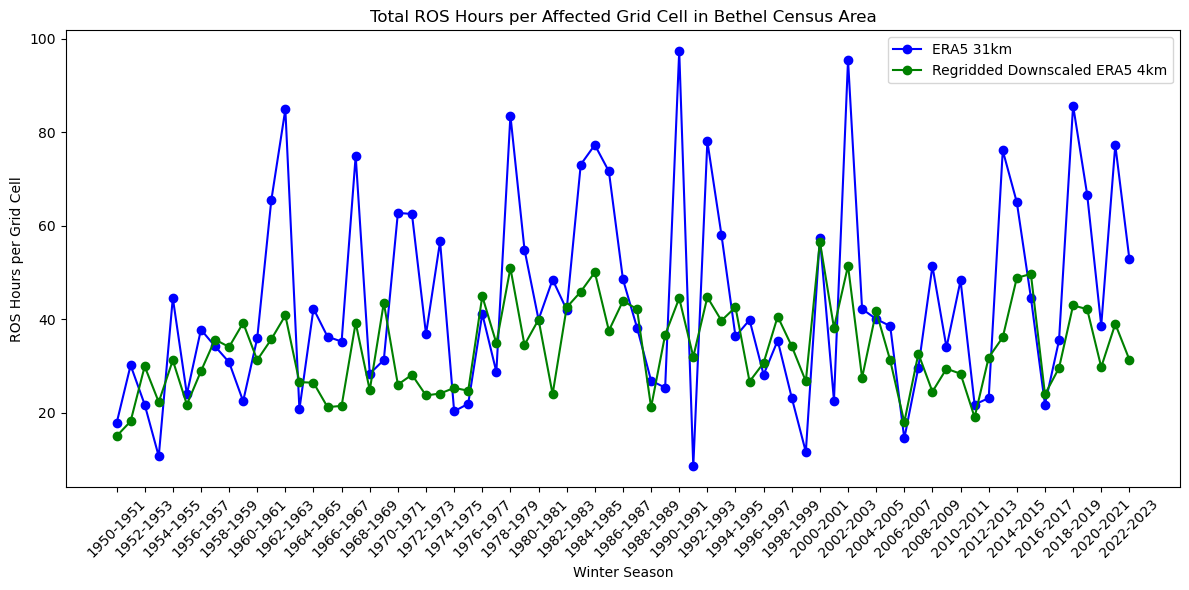

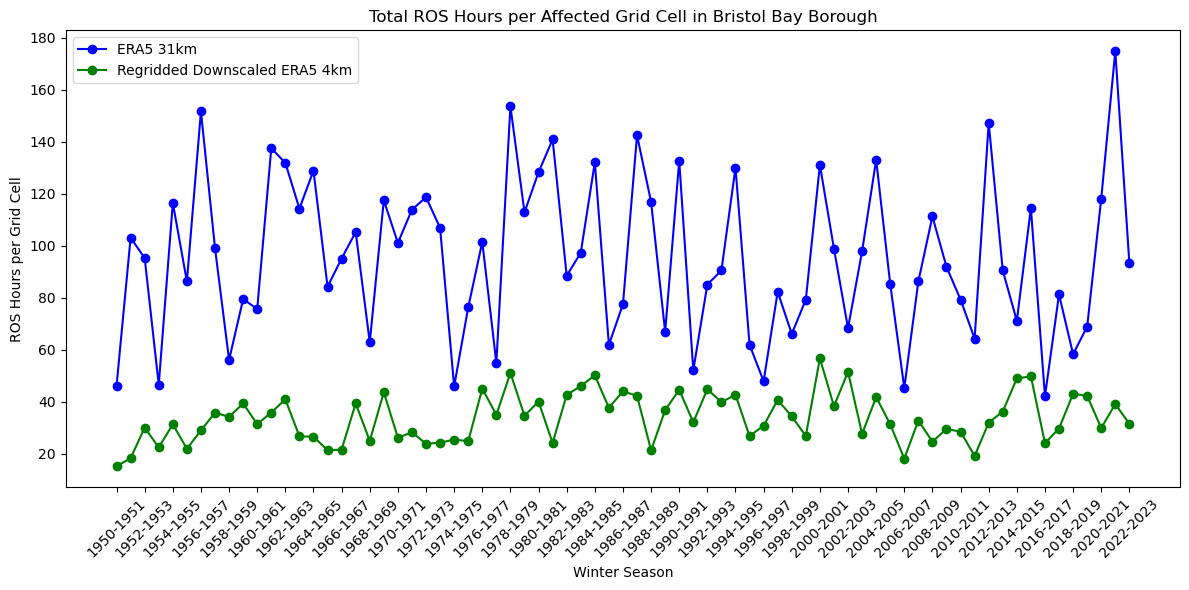

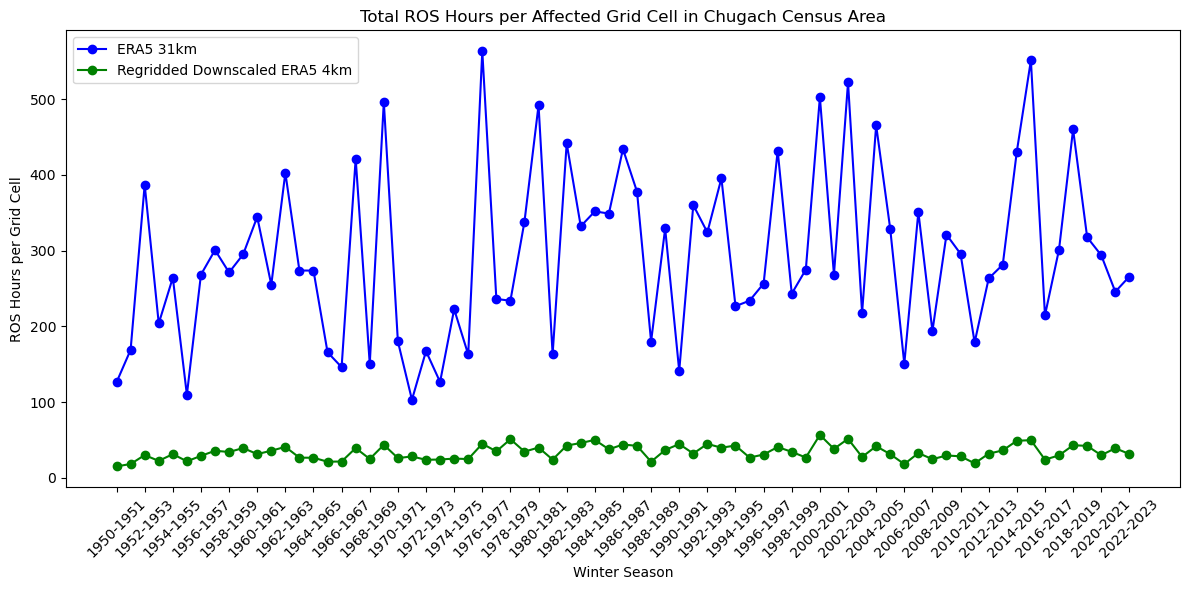

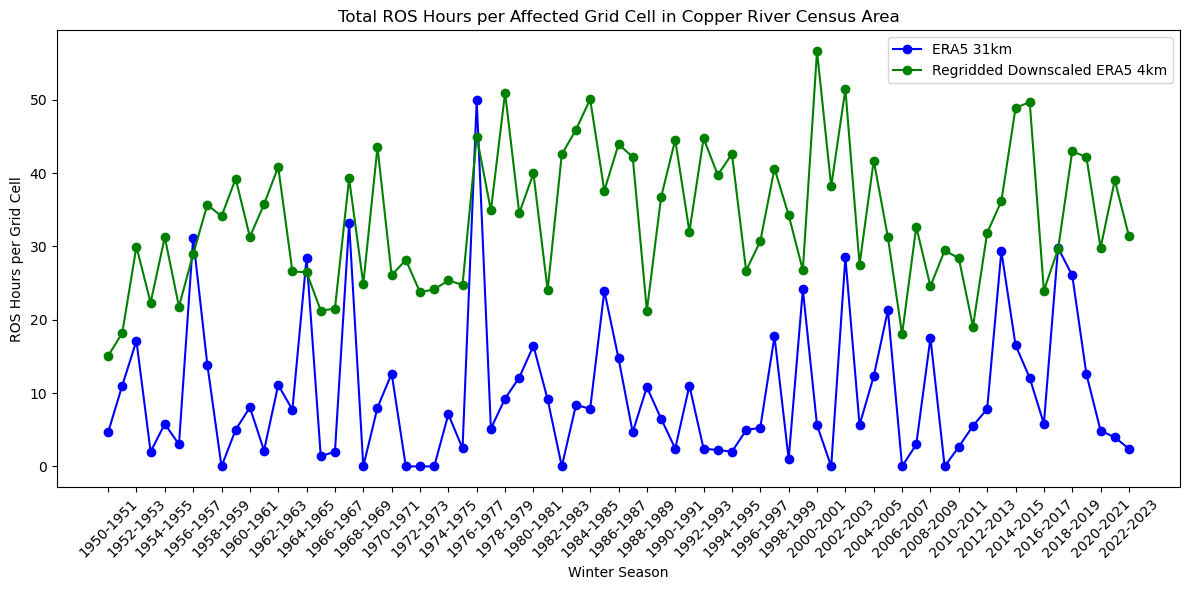

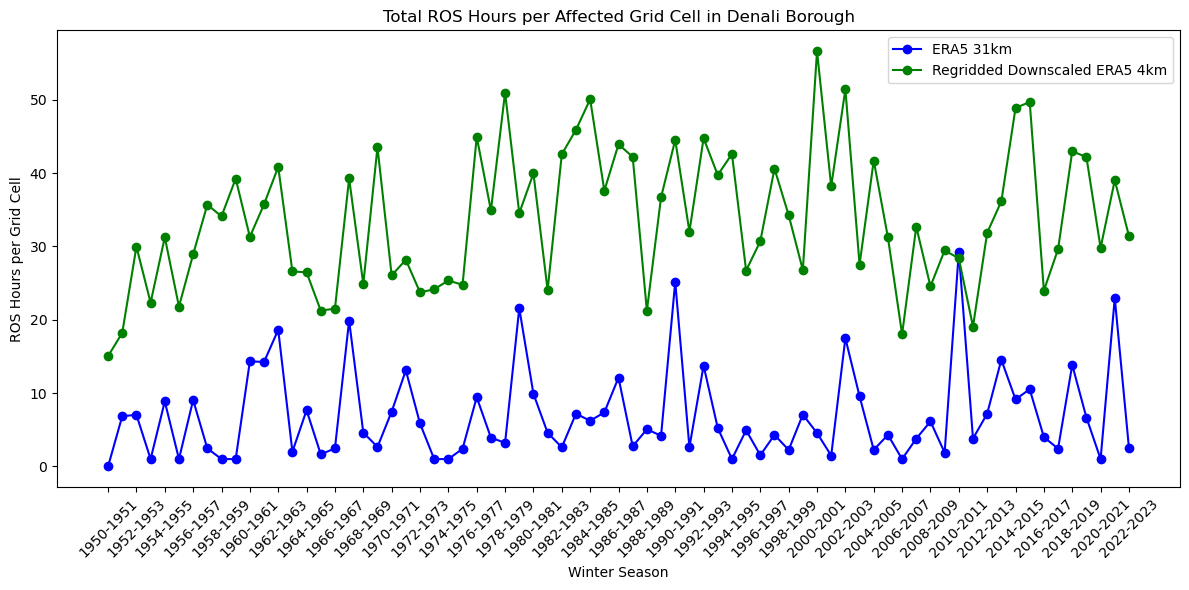

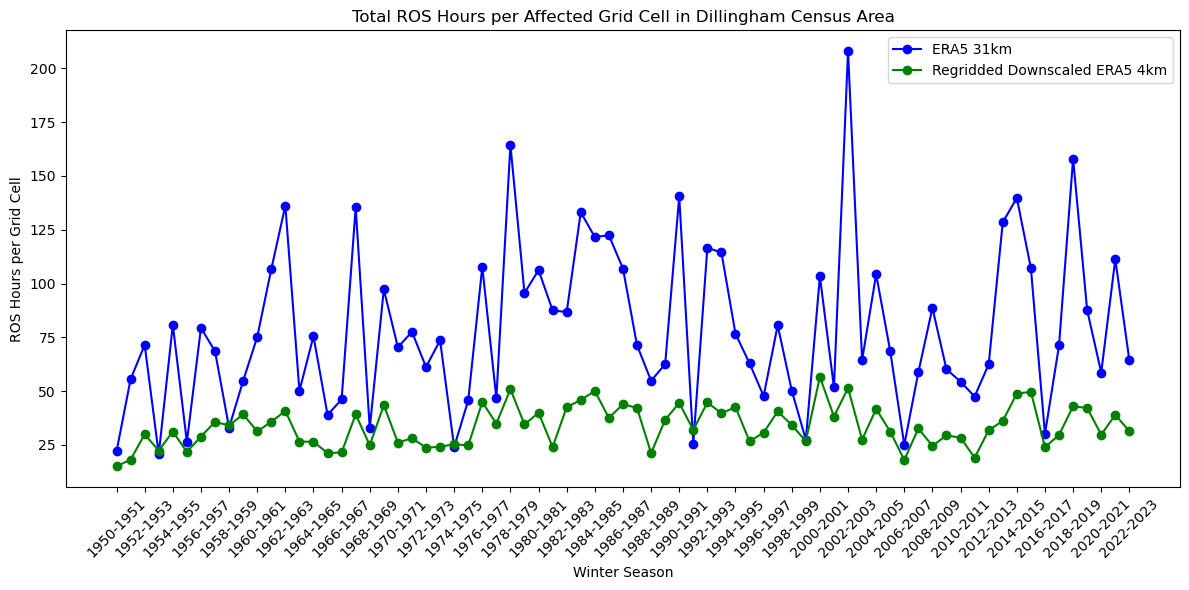

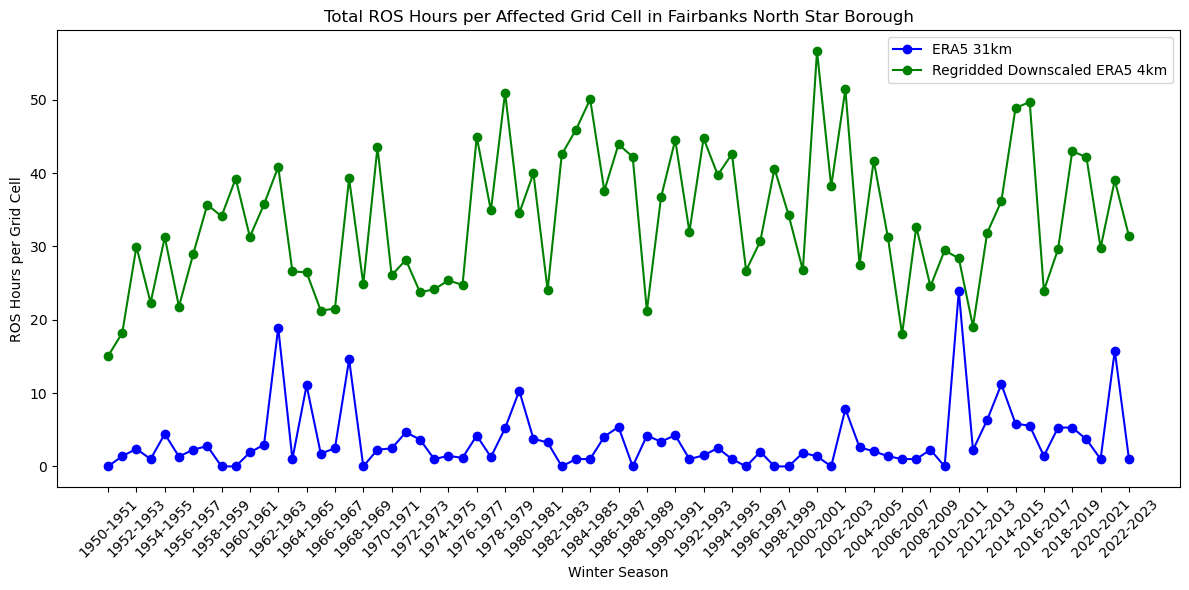

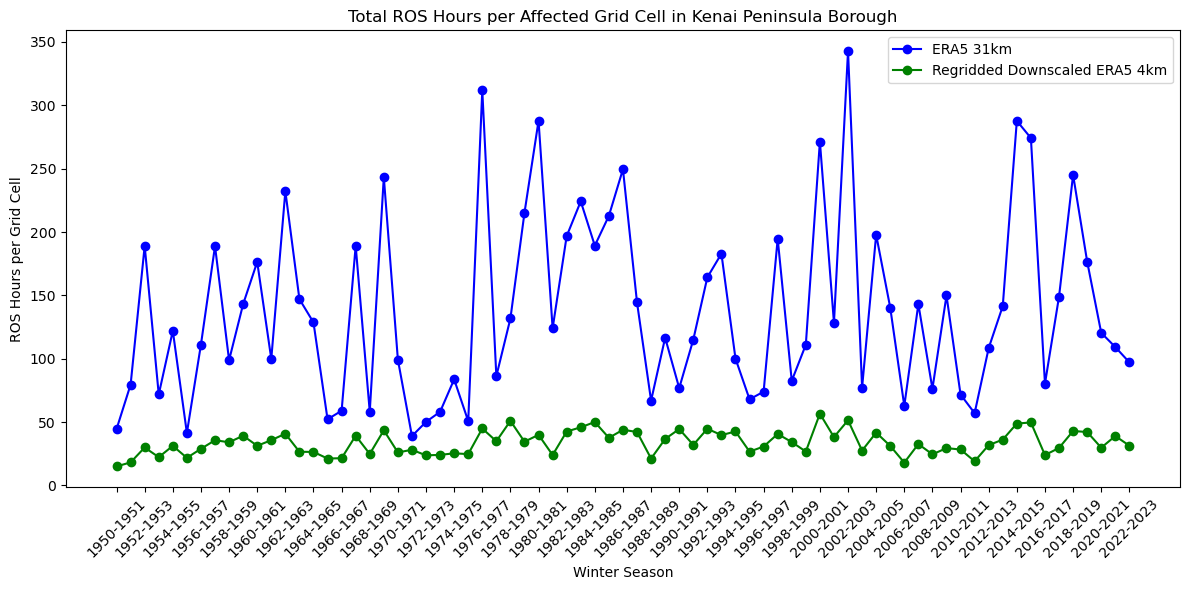

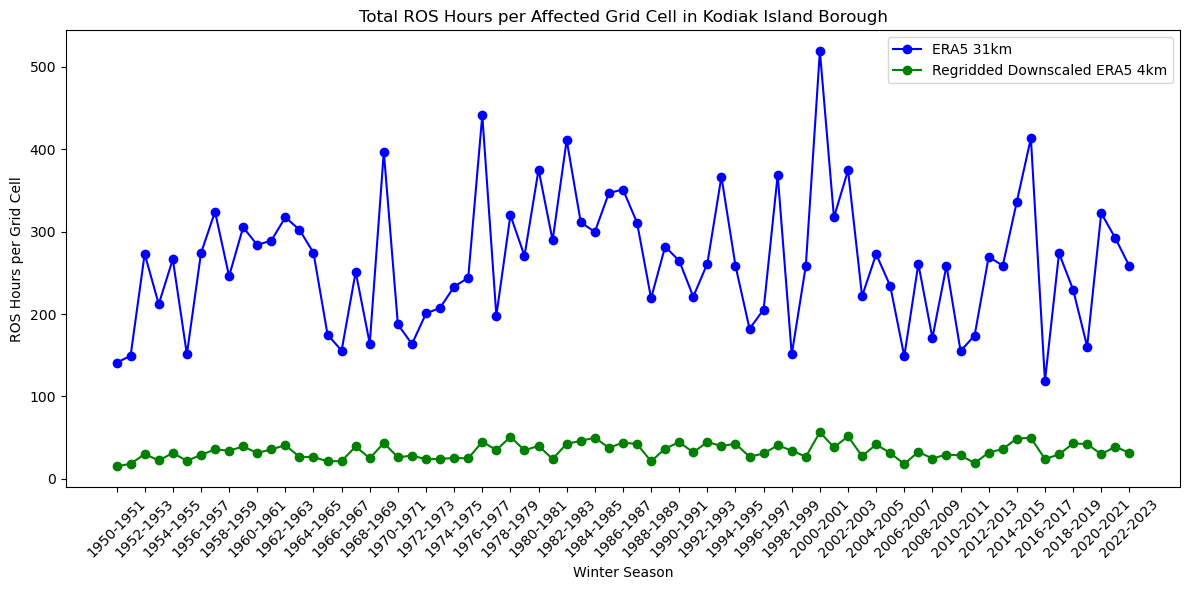

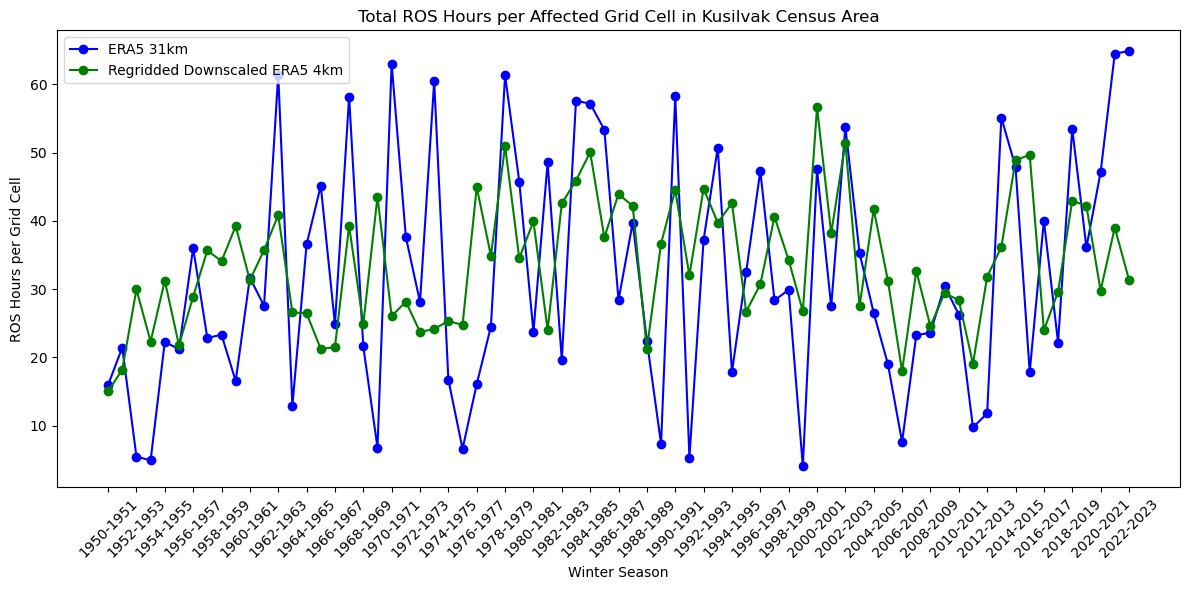

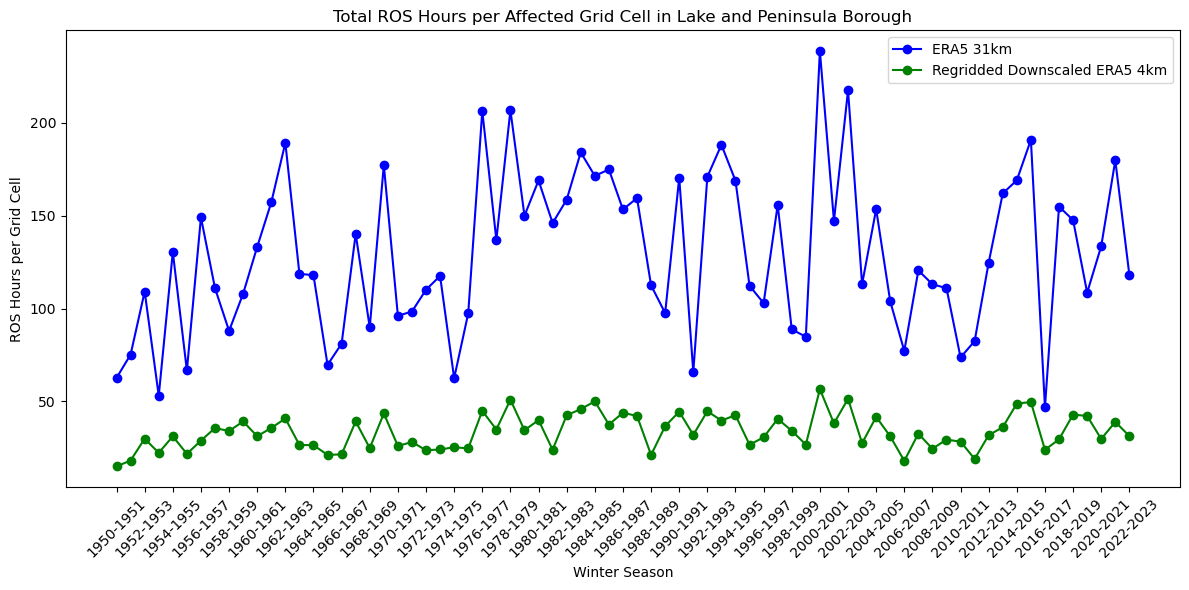

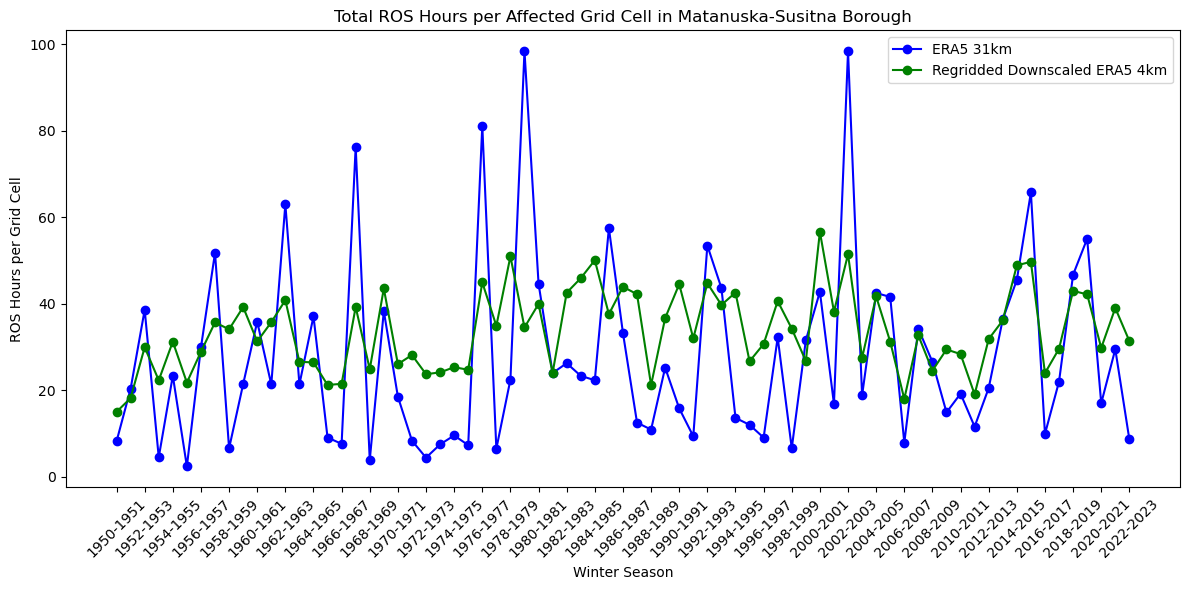

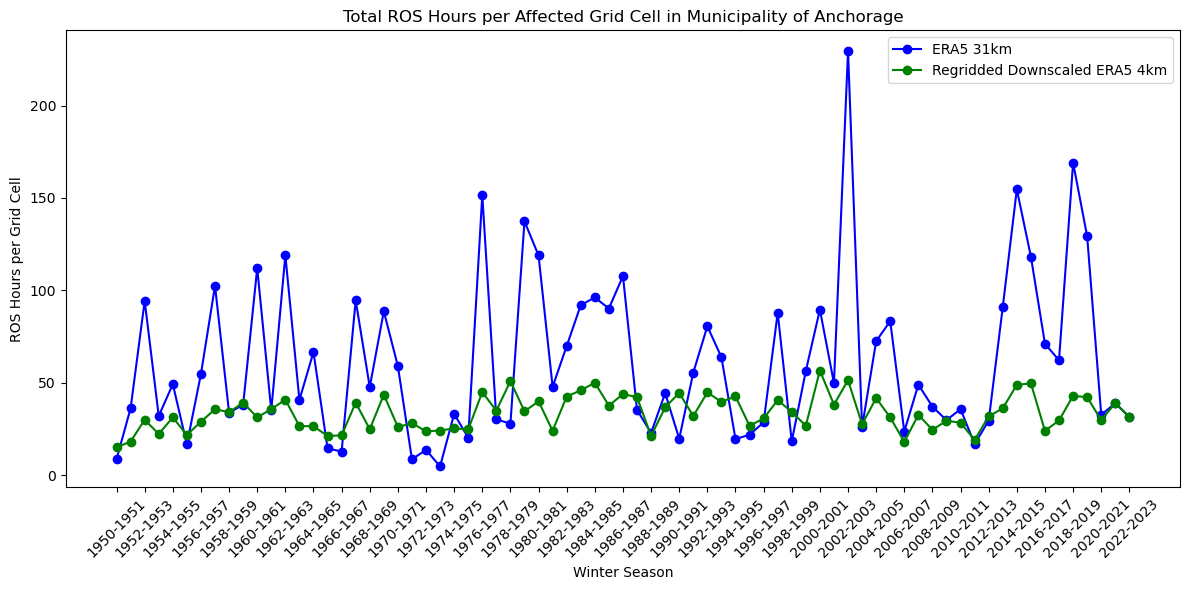

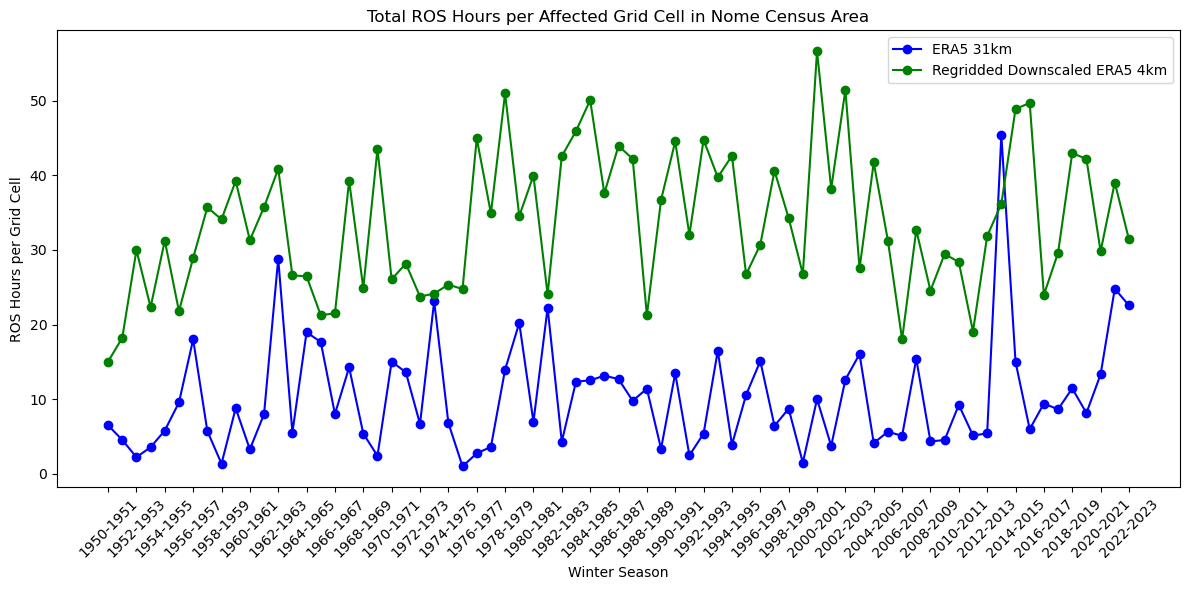

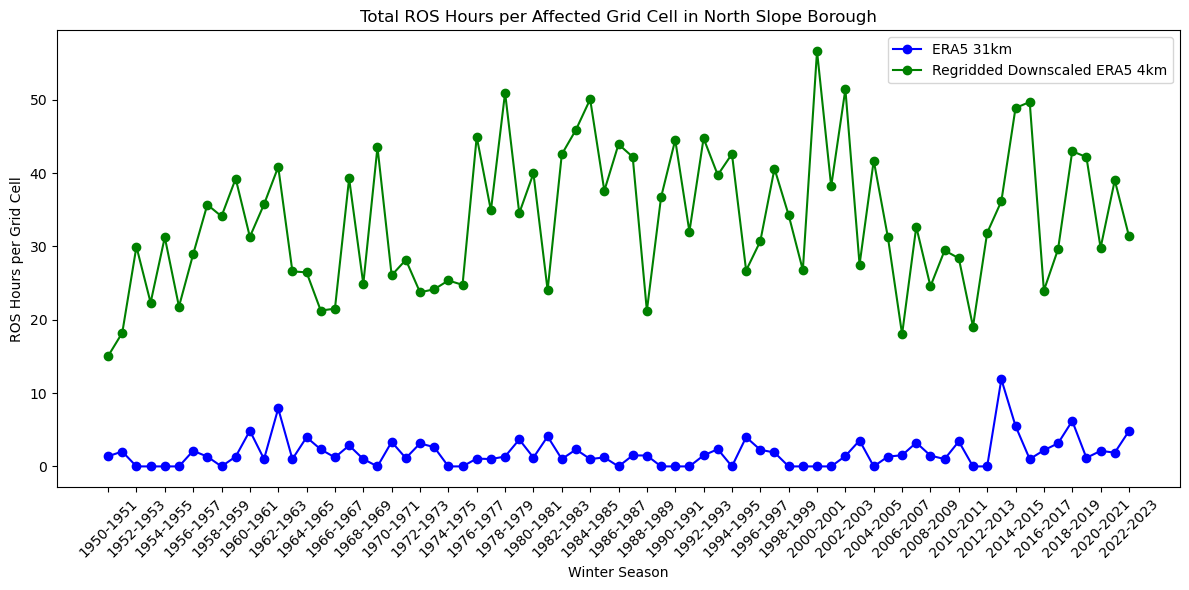

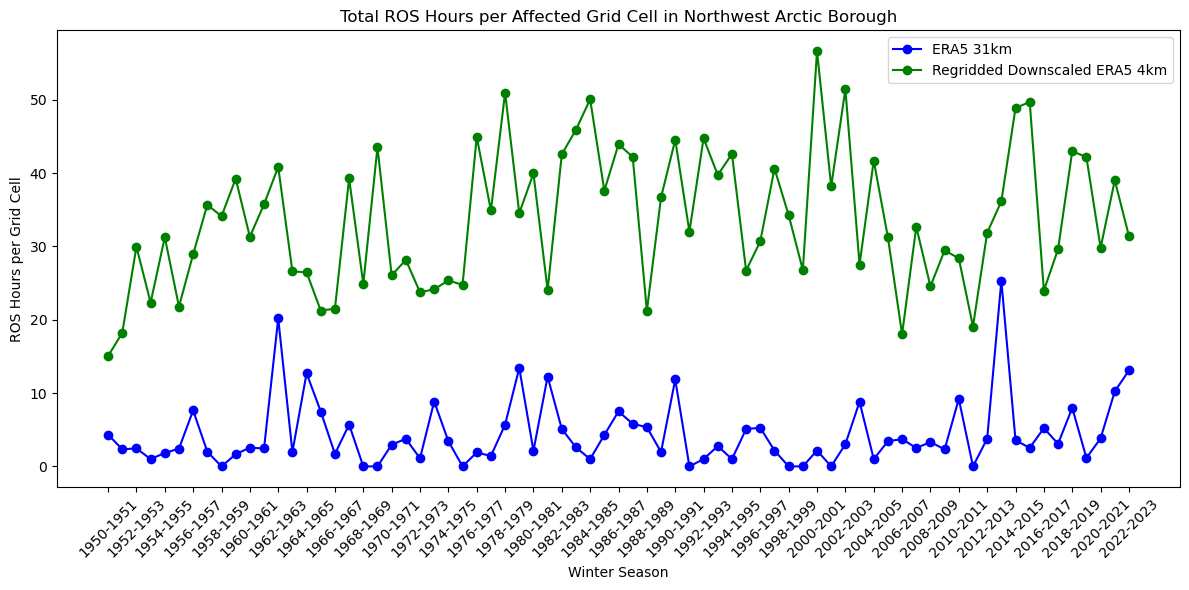

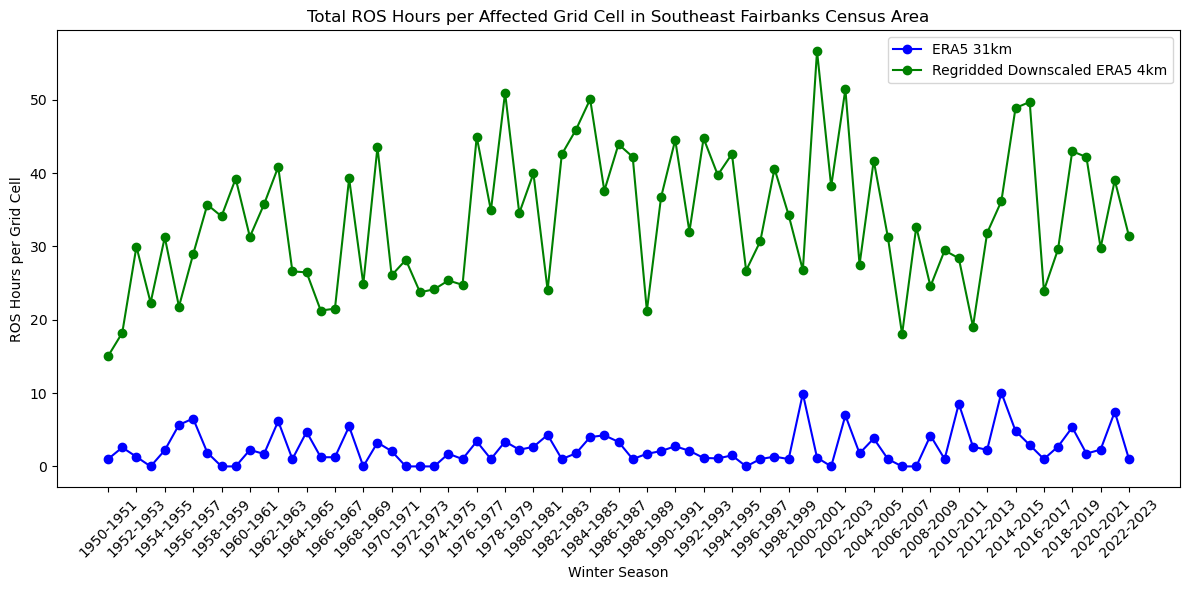

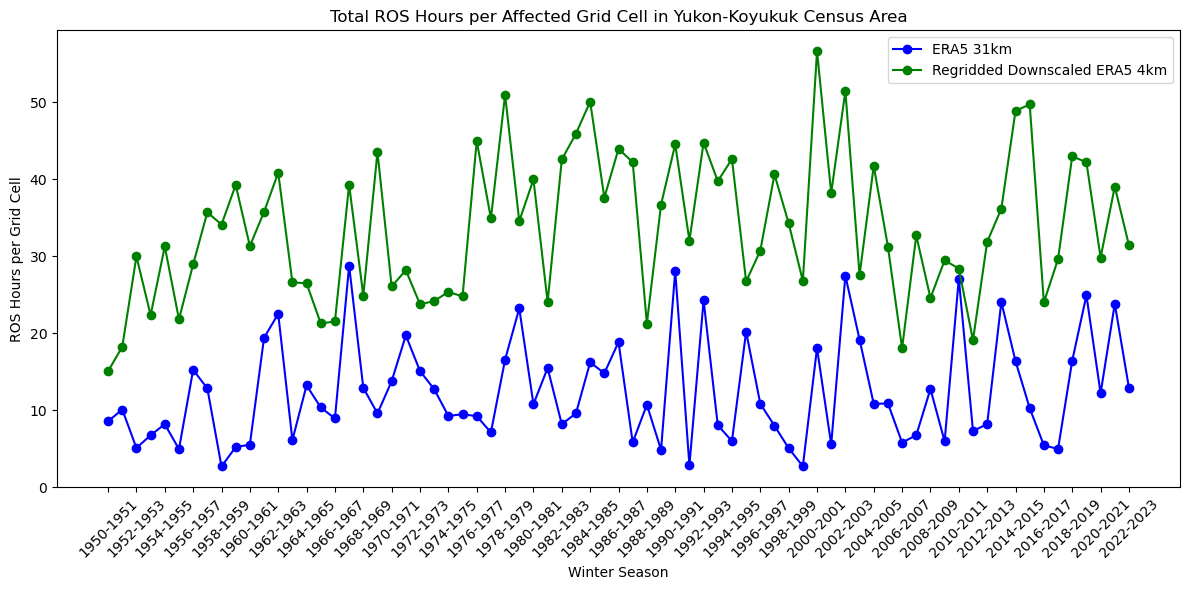

In [100]:
for borough_name in borough_list_filtered:
    data_to_plot = ERA5_31km_data['normalized'].sel(borough=borough_name).values
    data_to_plot4km = ERA5_4km_data['normalized'].sel(borough=borough_name).values
    plt.figure(figsize=(12, 6))
    plt.plot(seasons_str, data_to_plot, marker='o', linestyle='-', color='blue', label='ERA5 31km')
    plt.plot(seasons_str, data_to_plot4km, marker='o', linestyle='-', color='green', label='Regridded Downscaled ERA5 4km')
    plt.title(f'Total ROS Hours per Affected Grid Cell in {borough_name}')
    plt.xlabel('Winter Season')
    plt.ylabel('ROS Hours per Grid Cell')
    plt.legend()
    plt.xticks(ticks=range(0, len(seasons_str), 2), labels=seasons_str[::2], rotation=45)
    plt.tight_layout()
    plt.show()

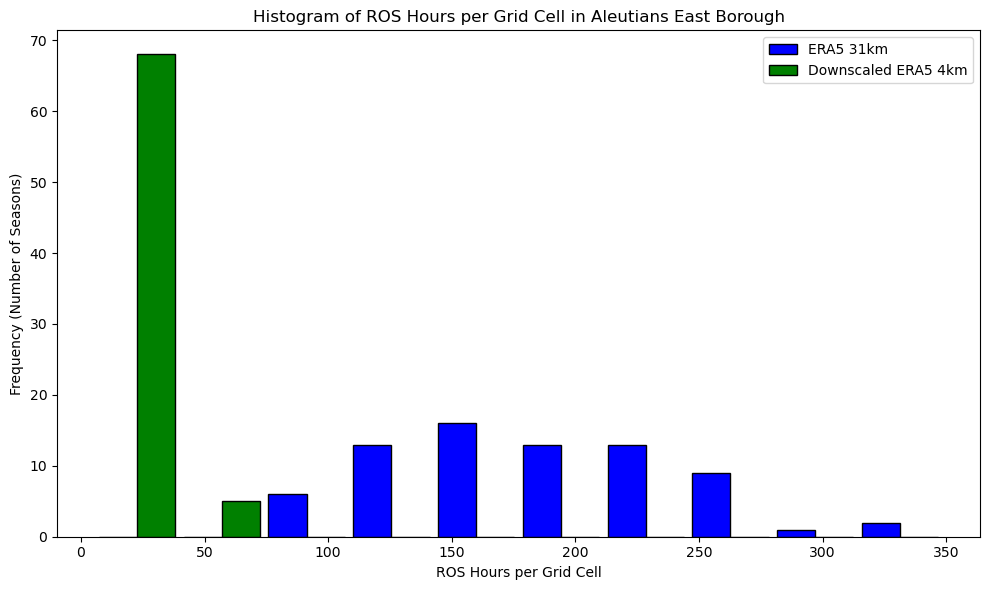

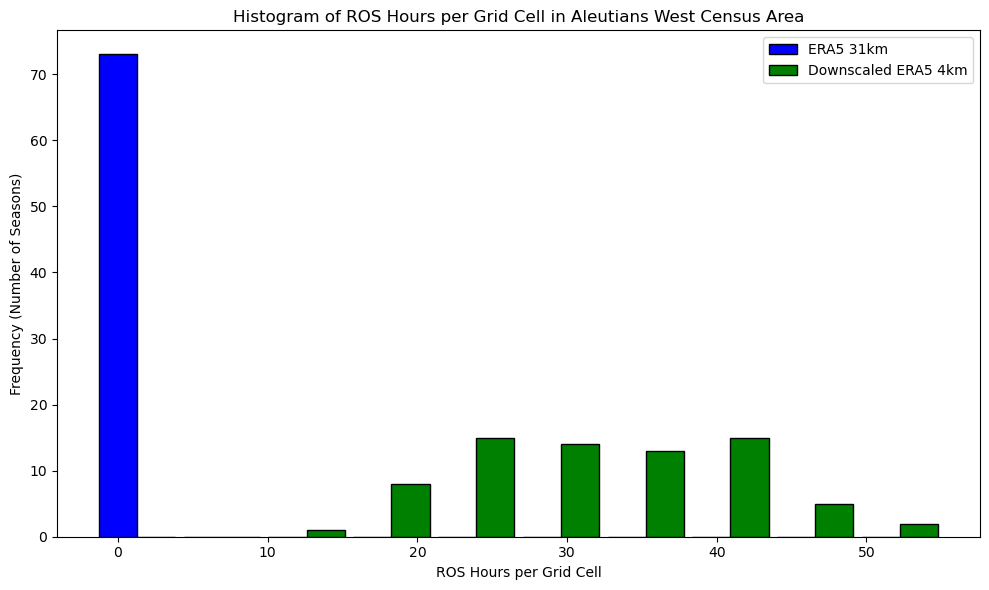

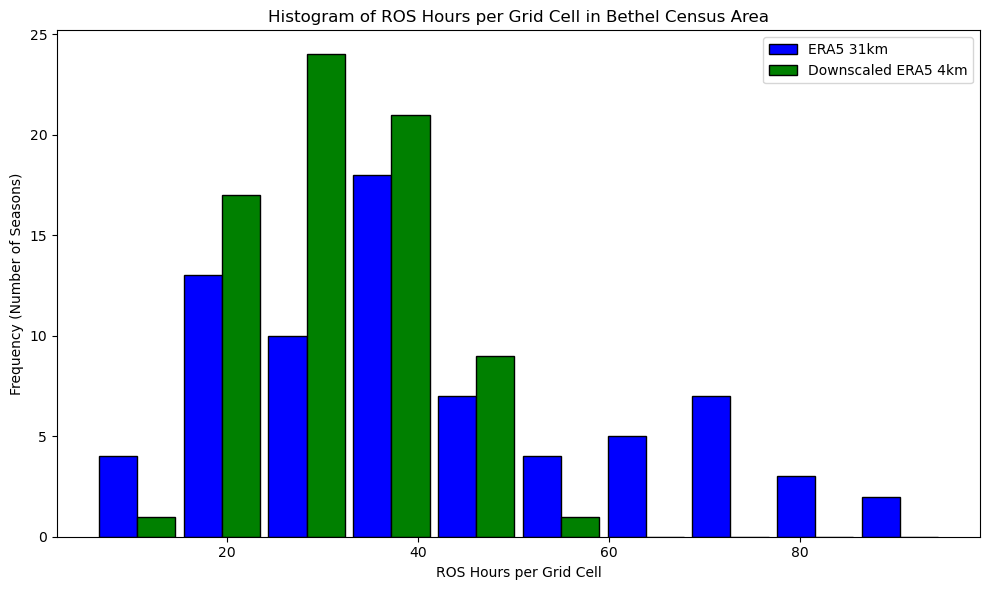

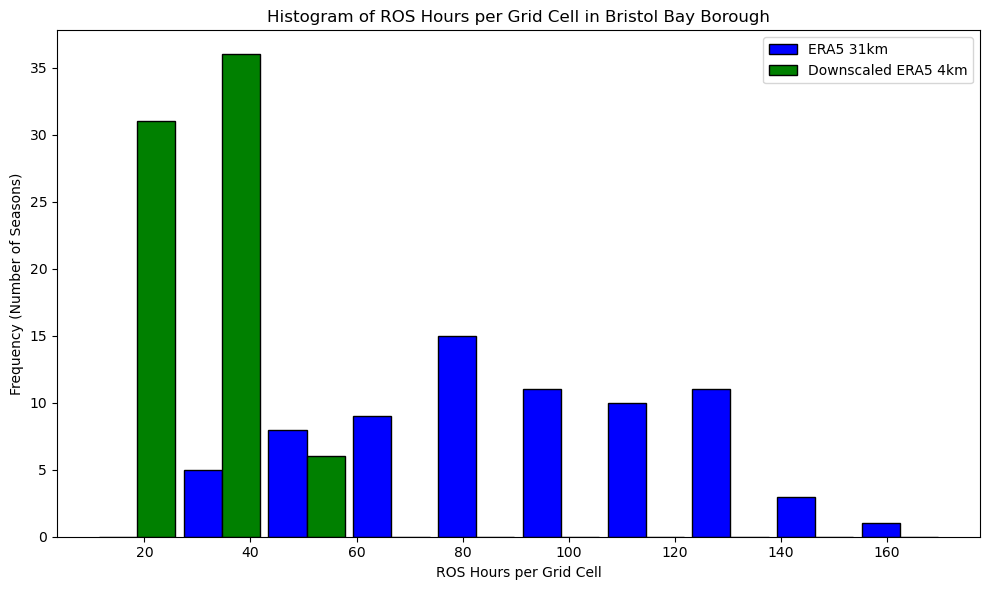

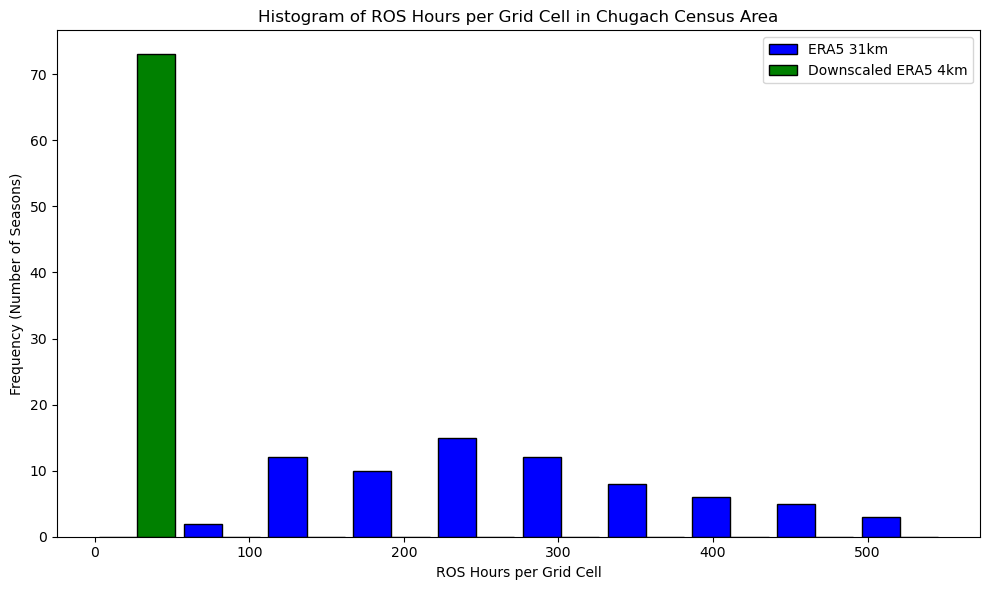

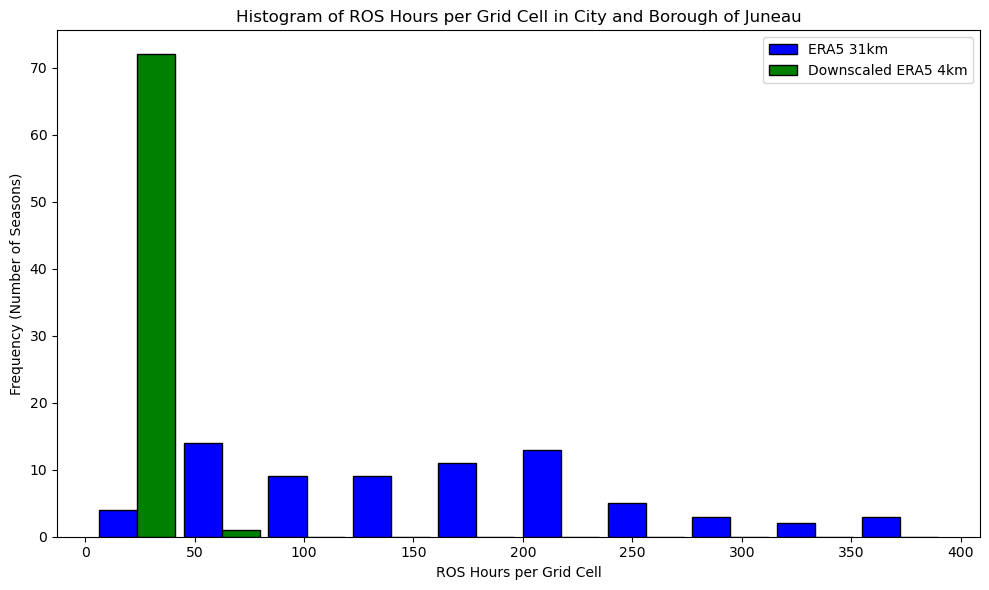

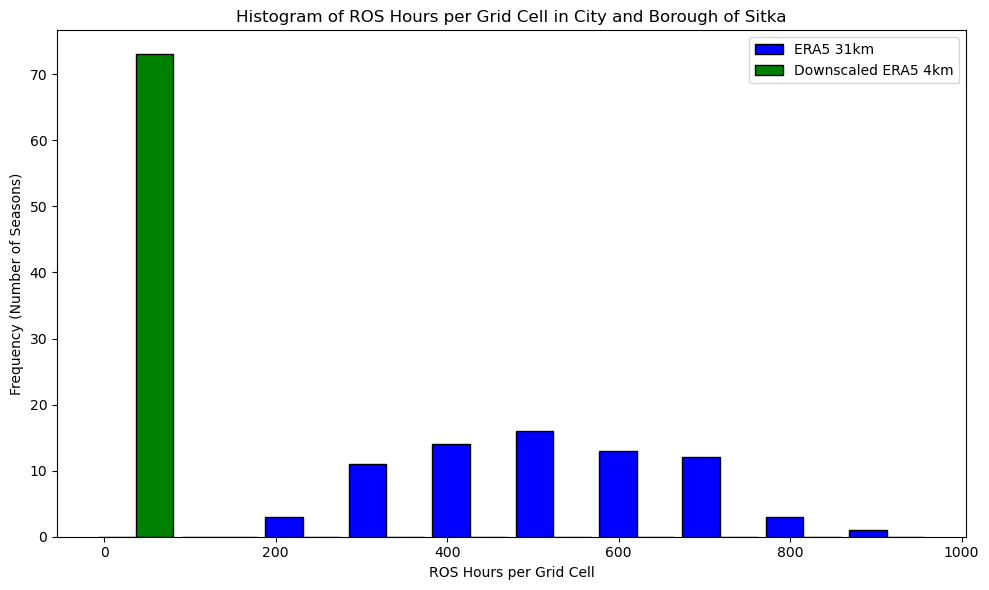

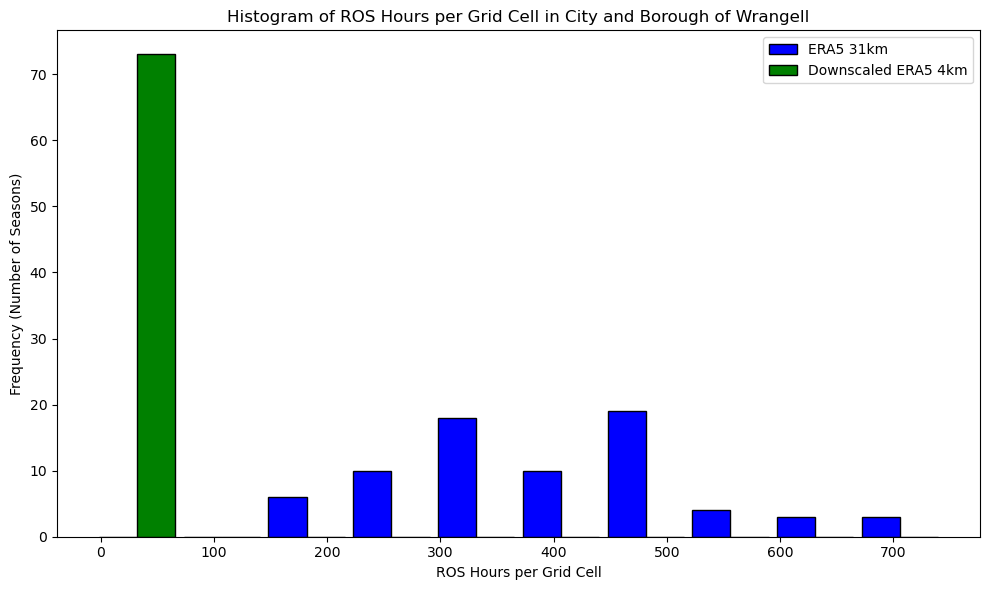

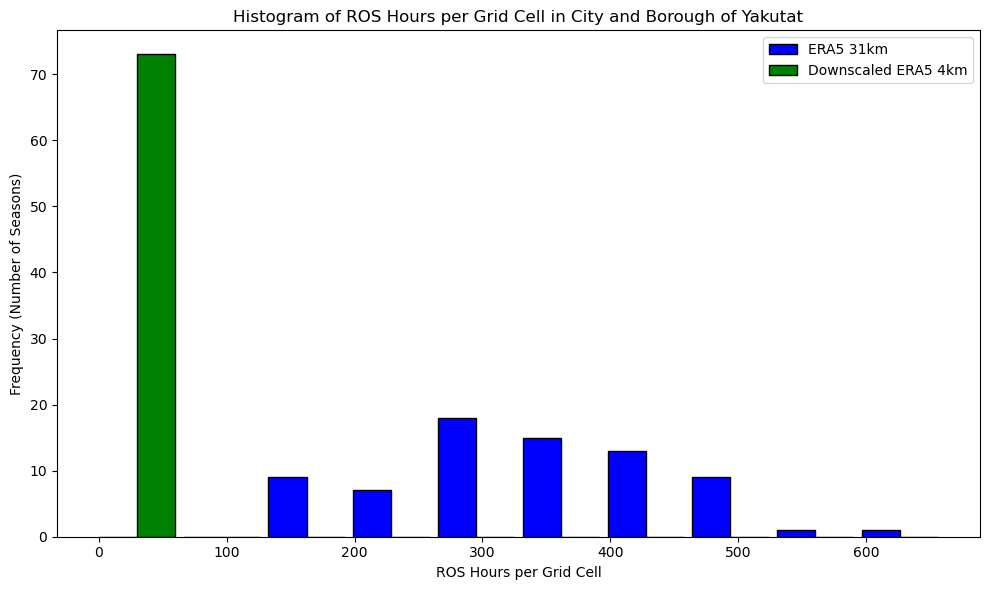

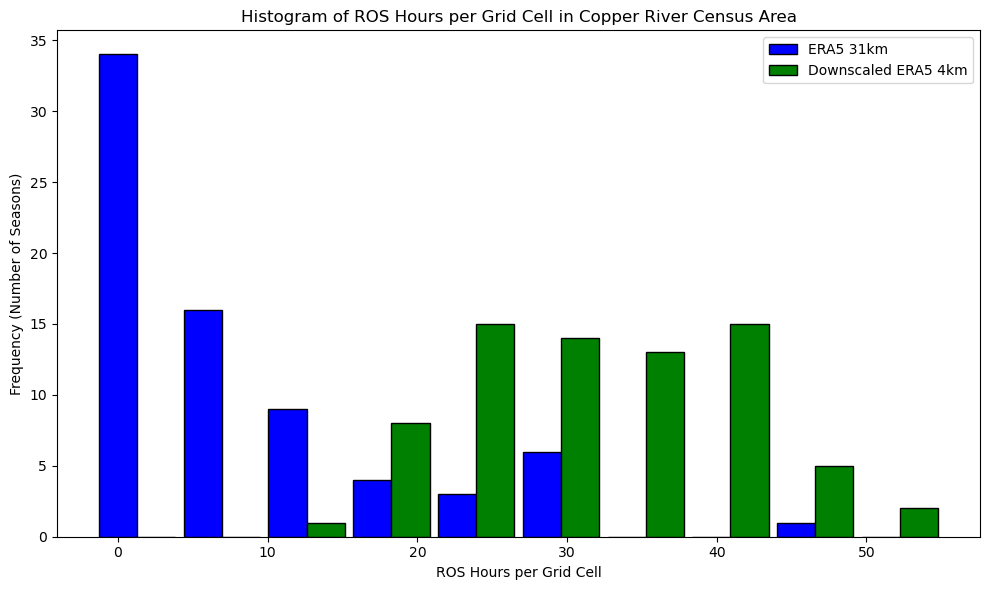

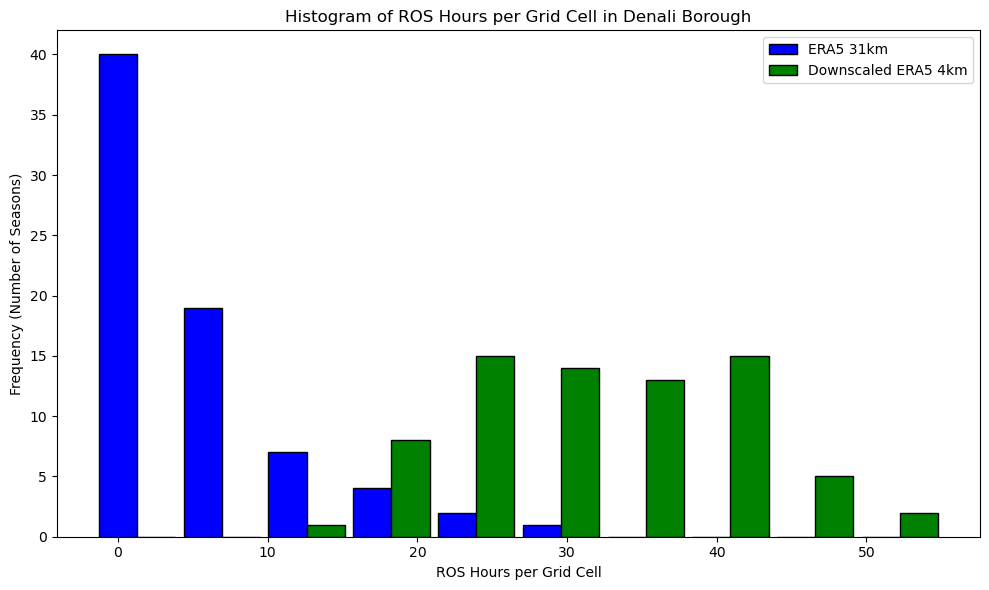

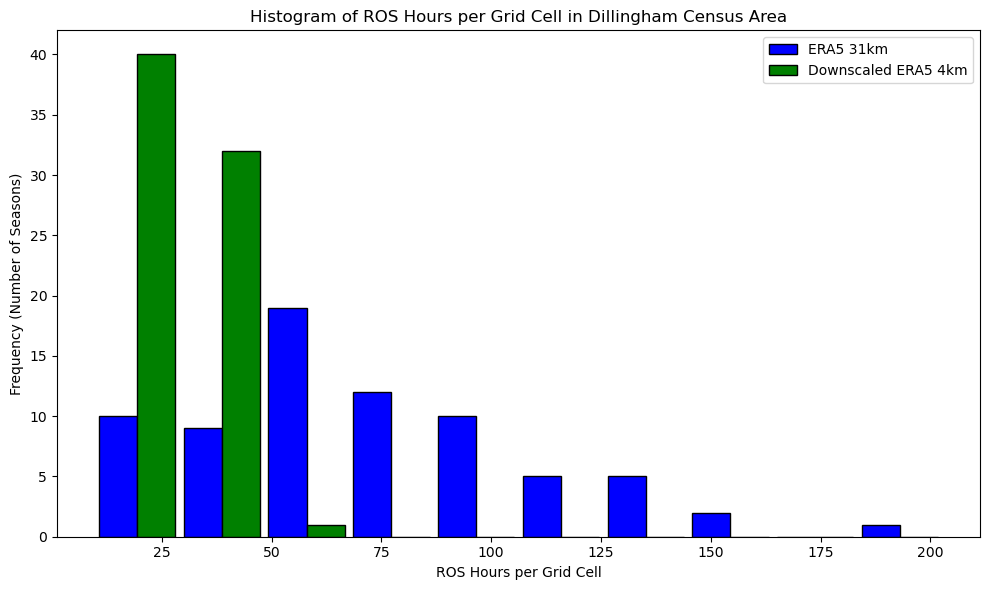

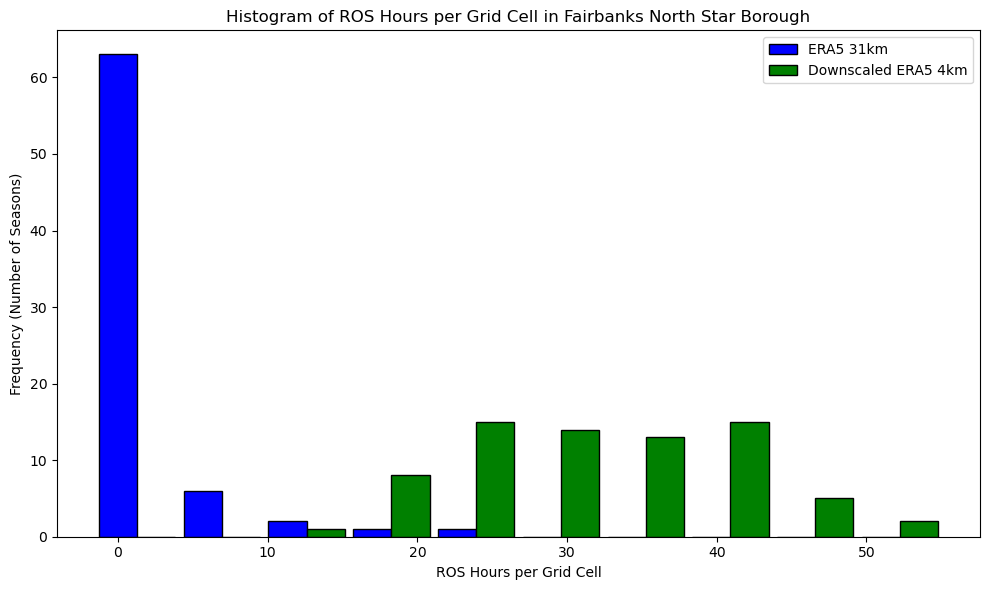

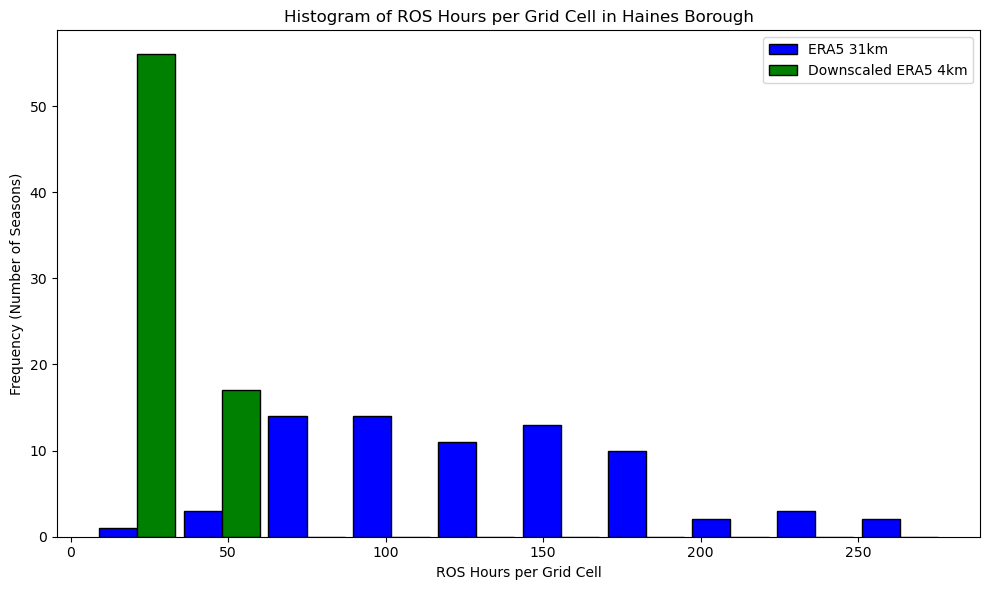

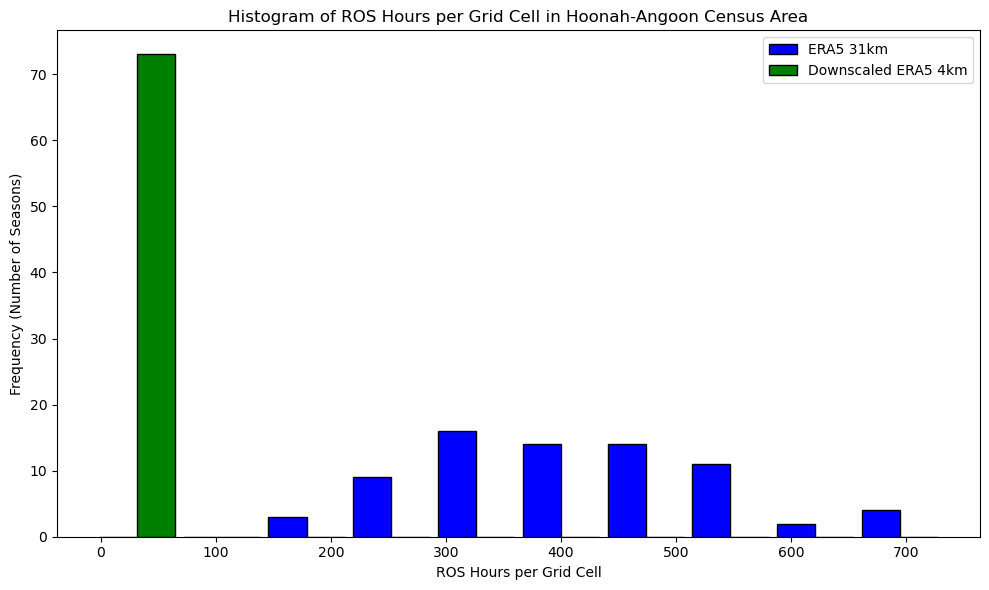

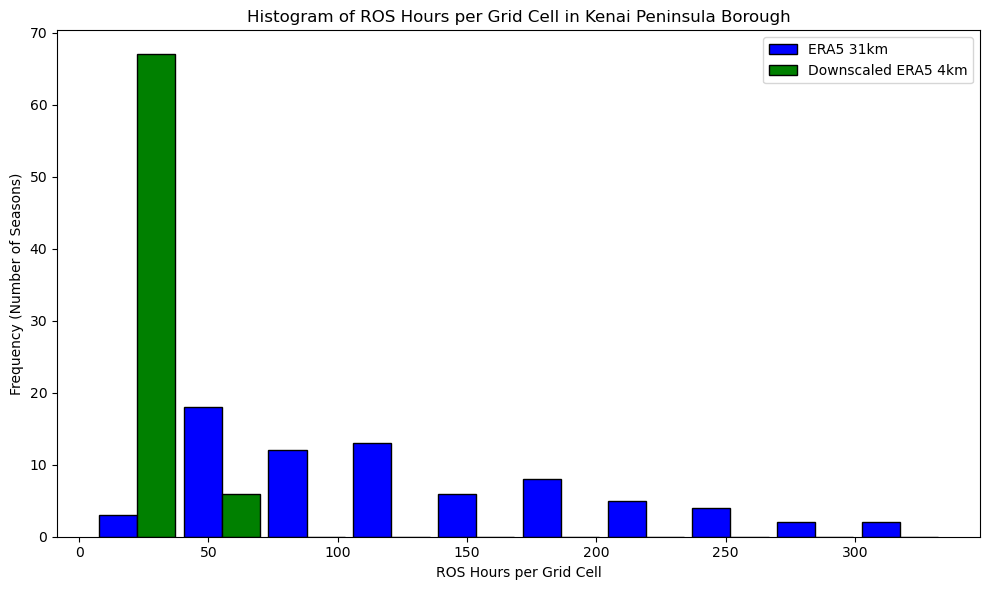

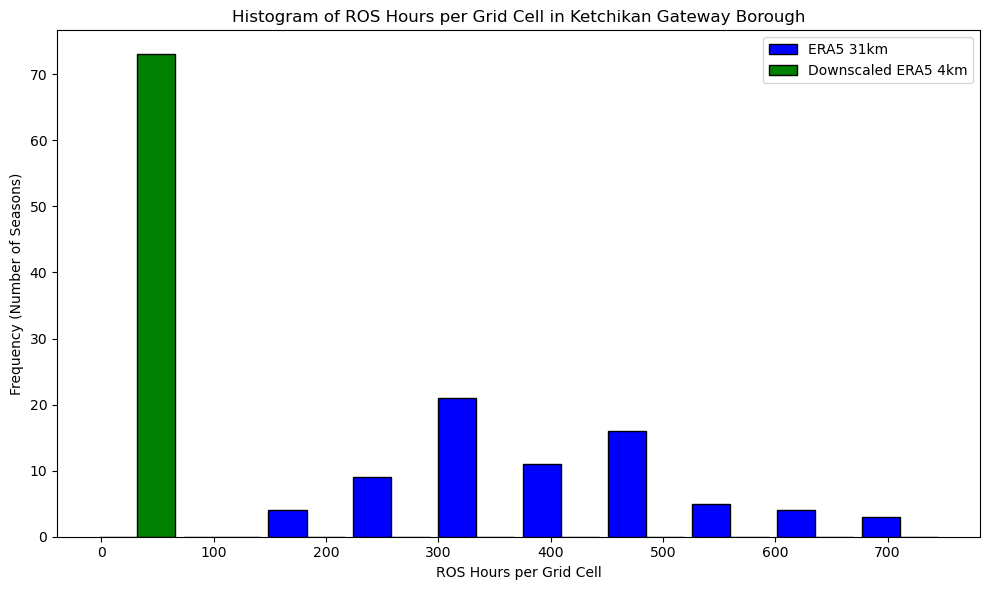

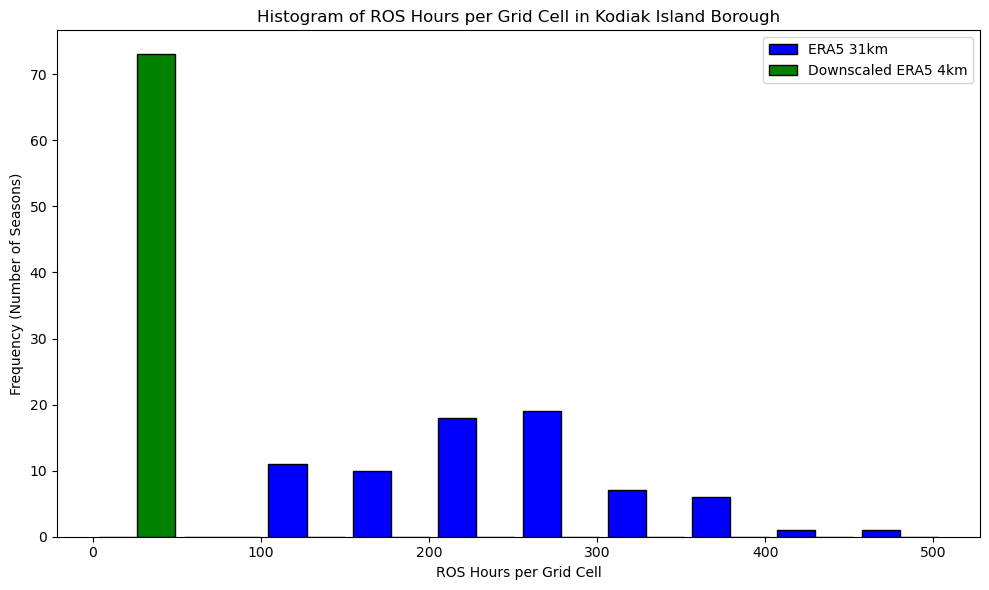

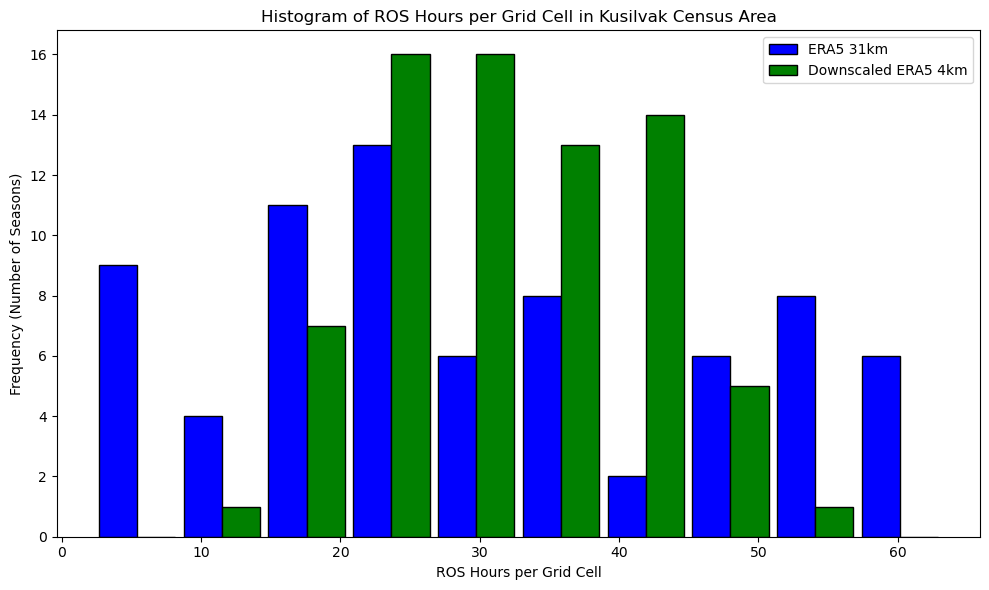

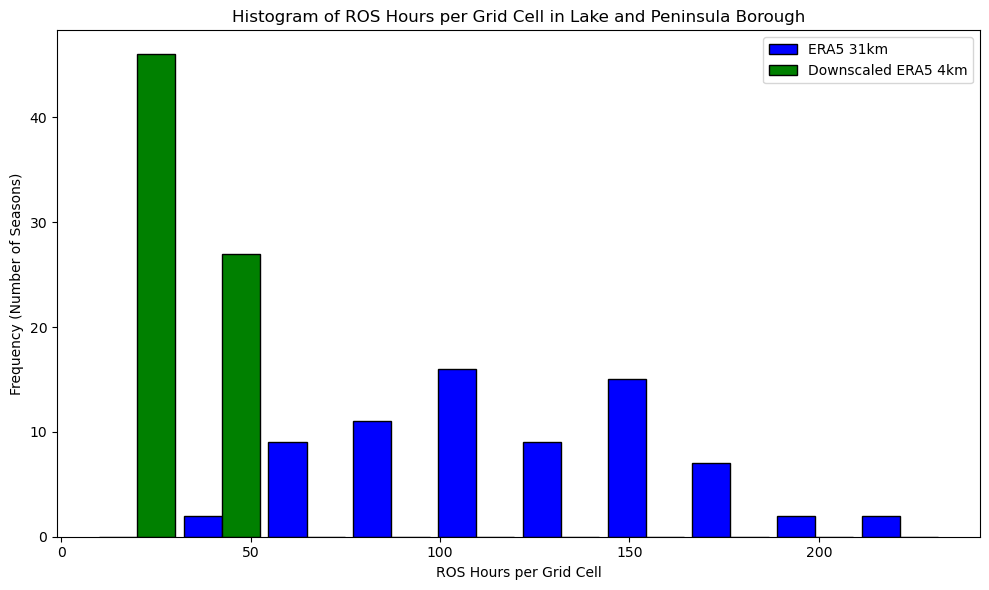

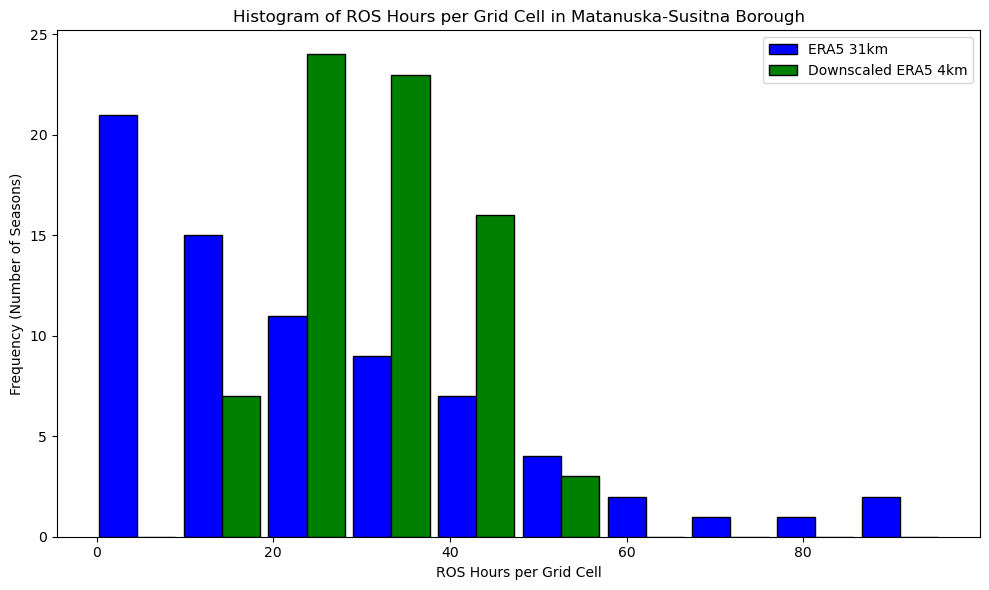

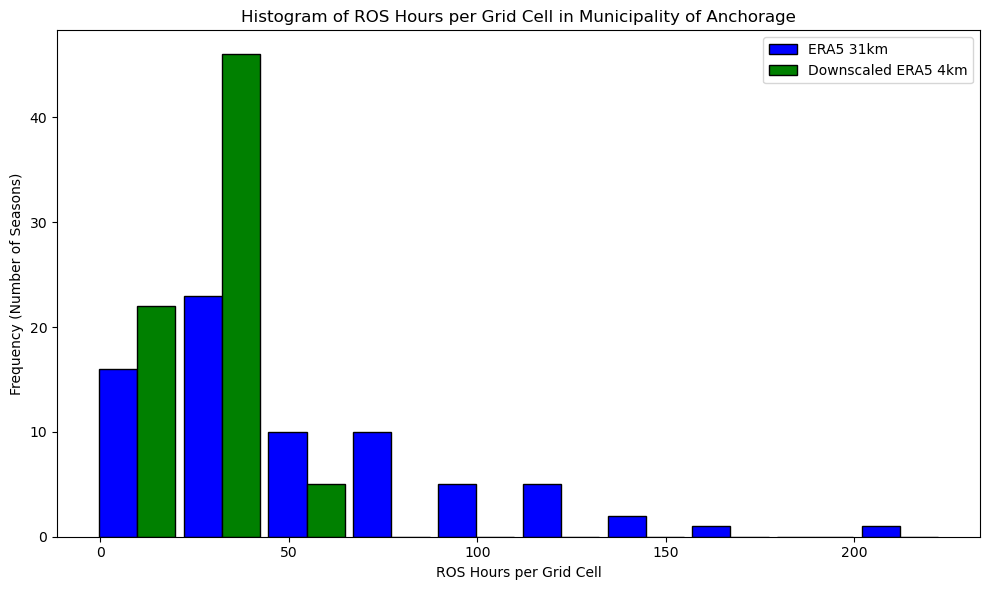

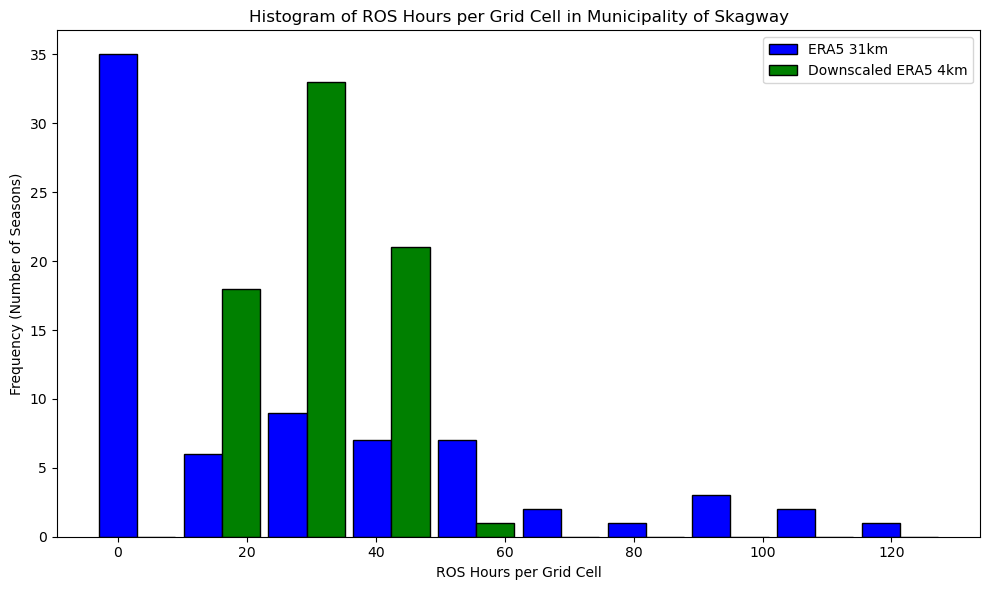

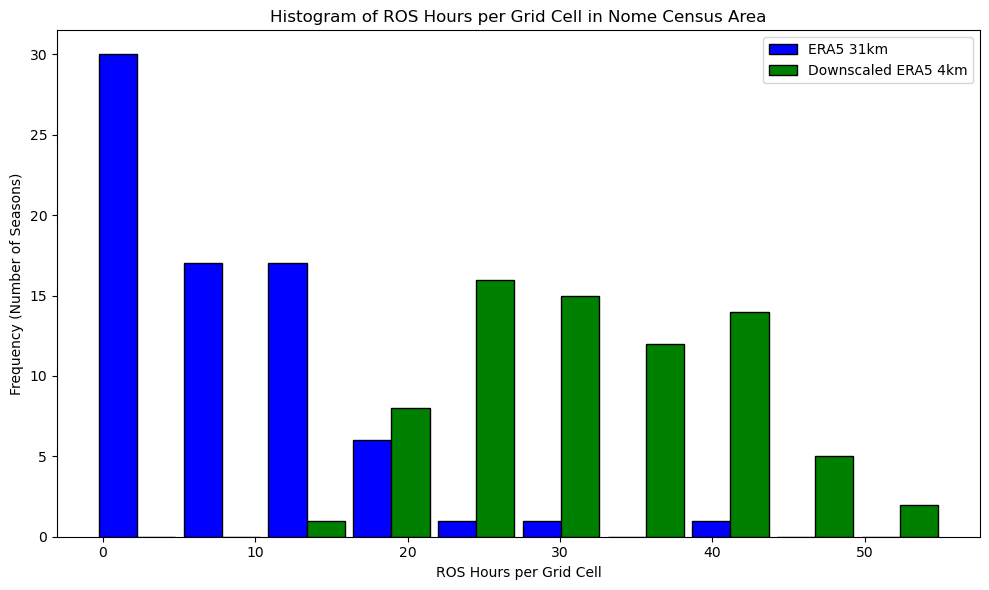

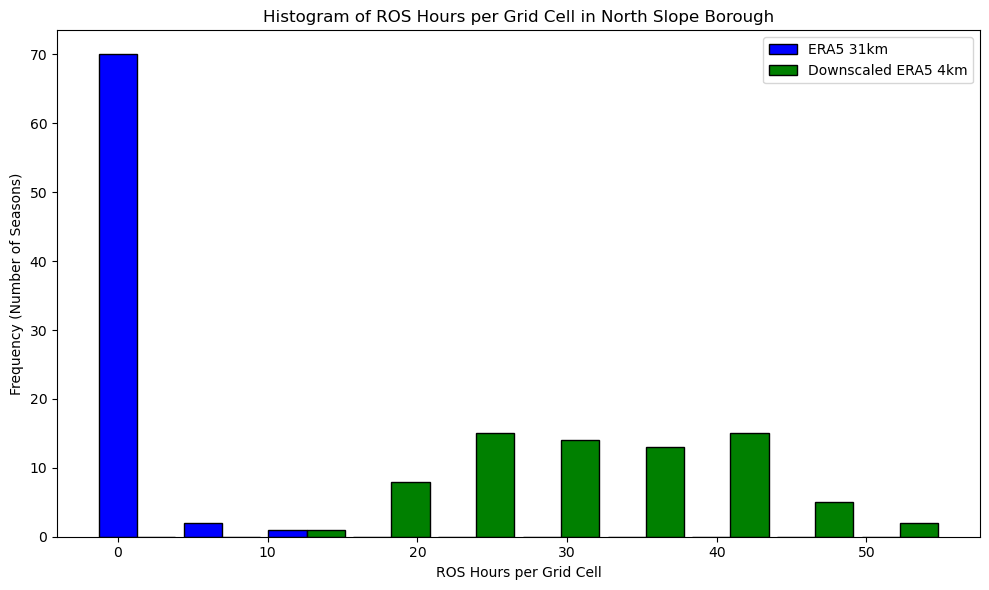

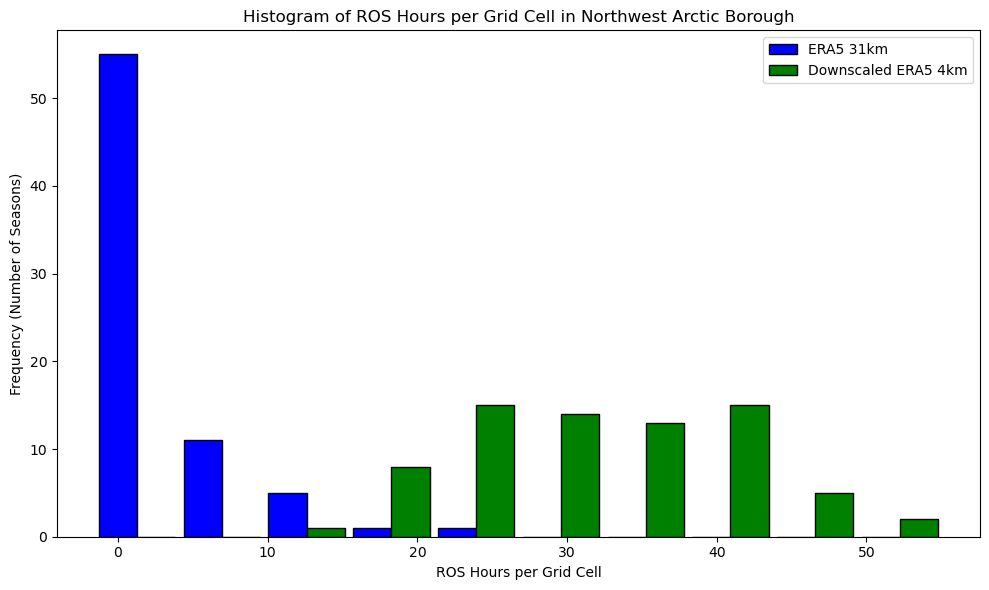

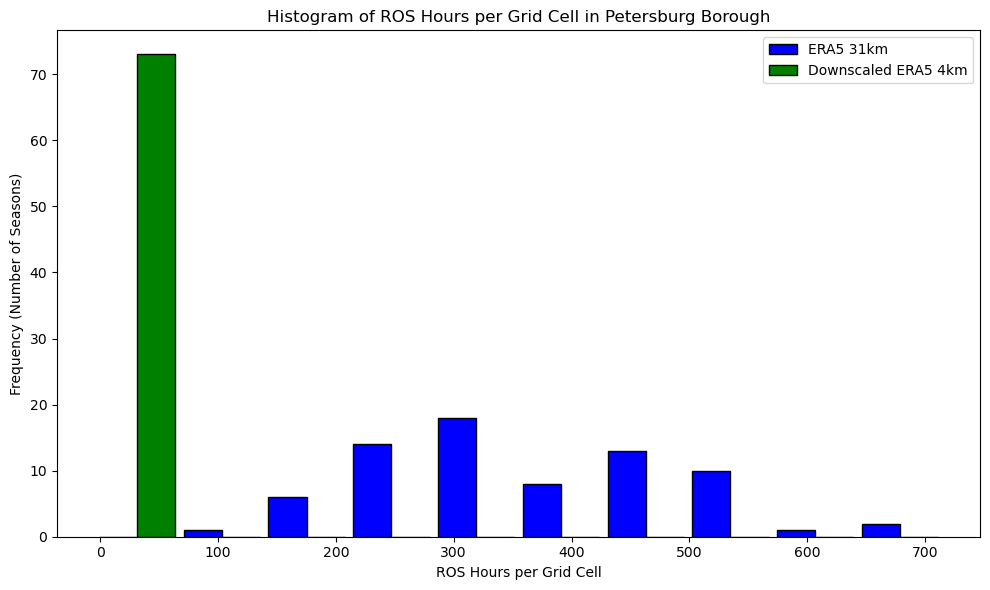

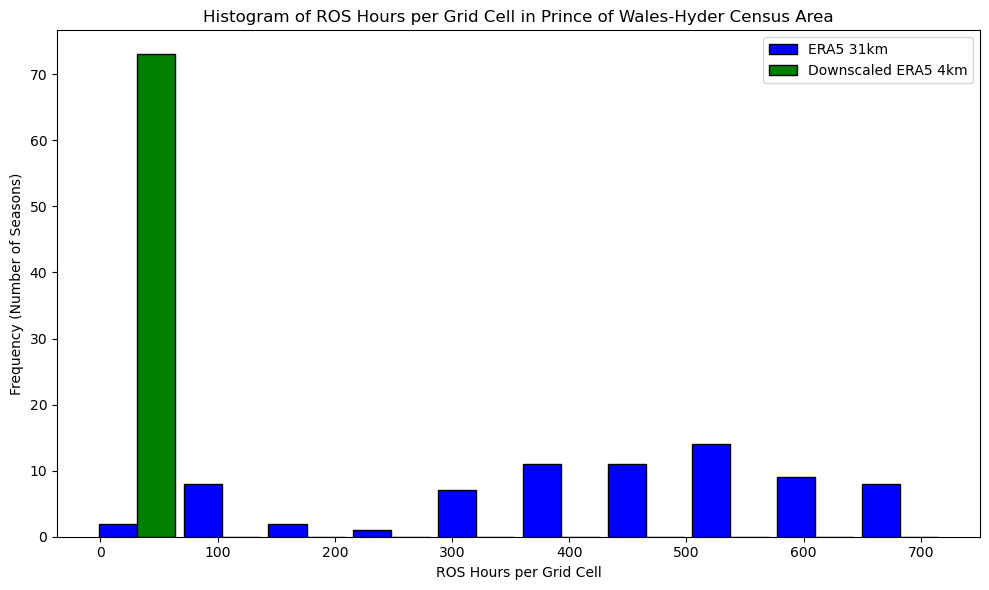

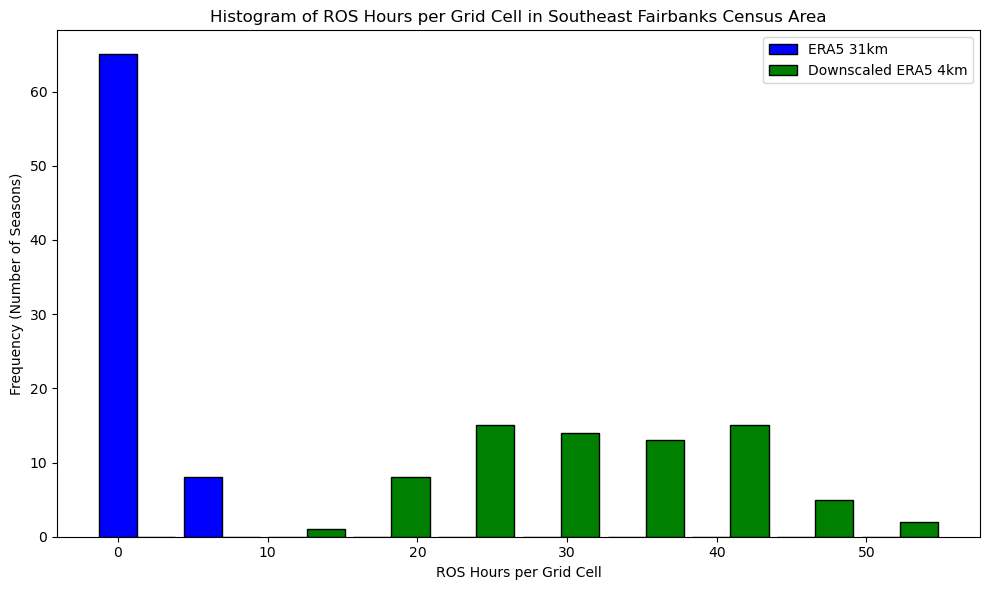

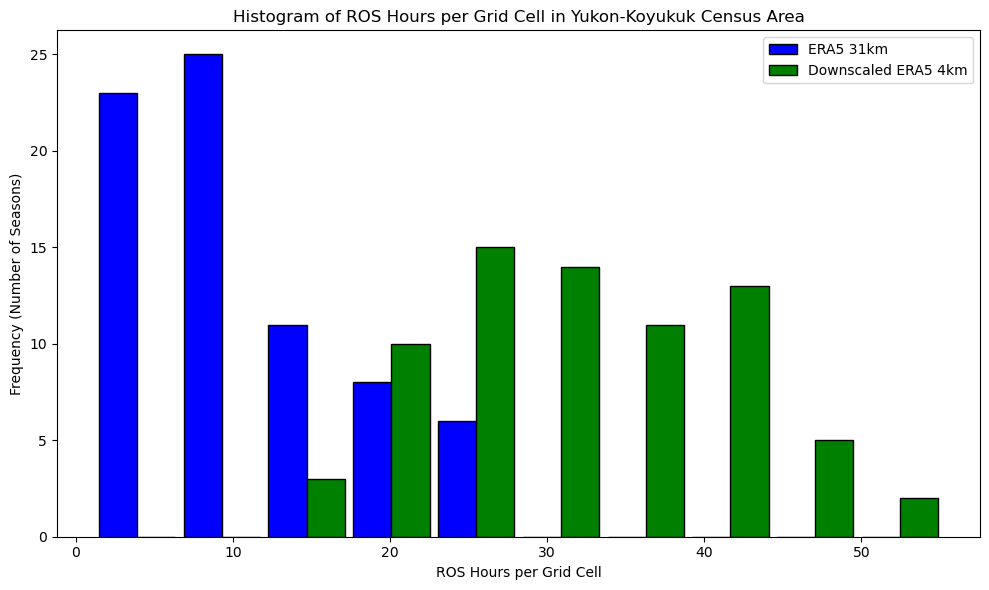

In [31]:
for borough_name in borough_list_filtered:
    data_to_plot = ERA5_31km_data['normalized'].sel(borough=borough_name).dropna(dim='season').values
    data_to_plot4km = ERA5_4km_data['normalized'].sel(borough=borough_name).dropna(dim='season').values
    
    bins = np.linspace(min(data_to_plot.min(), data_to_plot4km.min()), max(data_to_plot.max(), data_to_plot4km.max()), 11)  # 10 bins
    
    counts_31km, _ = np.histogram(data_to_plot, bins=bins)
    counts_4km, _ = np.histogram(data_to_plot4km, bins=bins)
    
    bin_width = bins[1] - bins[0]
    
    plt.figure(figsize=(10, 6))
    plt.bar(bins[:-1], counts_31km, width=bin_width*0.45, color='blue', edgecolor='black', label='ERA5 31km')
    plt.bar(bins[:-1] + bin_width*0.45, counts_4km, width=bin_width*0.45, color='green', edgecolor='black', label='Downscaled ERA5 4km')
    
    plt.title(f'Histogram of ROS Hours per Grid Cell in {borough_name}')
    plt.xlabel('ROS Hours per Grid Cell')
    plt.ylabel('Frequency (Number of Seasons)')
    plt.legend()
    plt.tight_layout()
    plt.show()


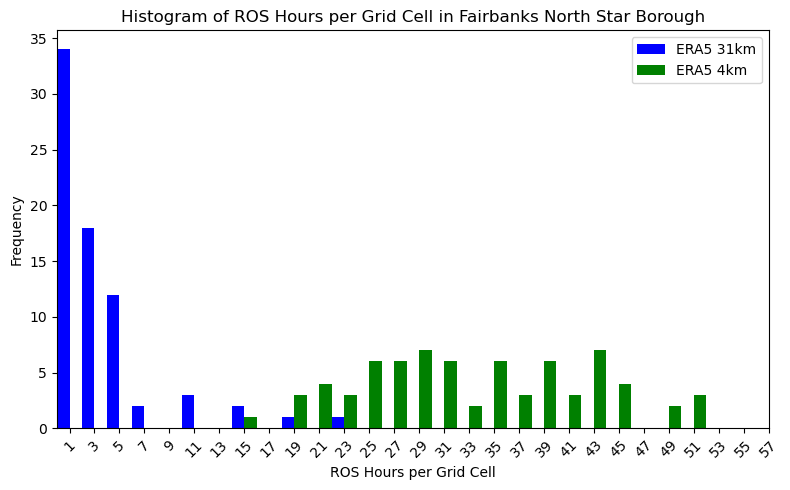

In [32]:
data_to_plot = ERA5_31km_data['normalized'].sel(borough='Fairbanks North Star Borough').dropna(dim='season').values
data_to_plot4km = ERA5_4km_data['normalized'].sel(borough='Fairbanks North Star Borough').dropna(dim='season').values

bin_width = 2

min_val = min(data_to_plot.min(), data_to_plot4km.min())
max_val = max(data_to_plot.max(), data_to_plot4km.max())
bins = np.arange(min_val, max_val + bin_width, bin_width)

# Histogram counts
counts_31km, _ = np.histogram(data_to_plot, bins=bins)
counts_4km, _ = np.histogram(data_to_plot4km, bins=bins)

bin_centers = bins[:-1] + bin_width/2

plt.figure(figsize=(8, 5))
plt.bar(bin_centers - bin_width*0.25, counts_31km,width=bin_width*0.5, color='b', label='ERA5 31km')

plt.bar(bin_centers + bin_width*0.25, counts_4km,width=bin_width*0.5,color='g',label='ERA5 4km')

plt.xlim(0,25)
plt.xlabel('ROS Hours per Grid Cell')
plt.ylabel('Frequency')
plt.title(f'Histogram of ROS Hours per Grid Cell in Fairbanks North Star Borough')
plt.xticks(bin_centers, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
